In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4e/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4e/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,8,0.857143,0,,0,,0.800000,CONTRADICTION
1,0.516922,1.424649,1.913,1.379,3.886845,0.005261,0.299131,2,0.142857,0,8,1,7,0.875000,0,,0,,0.333333,CONTRADICTION
2,0.000000,0.000000,2.176,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,7,1.000000,0,,0,,0.400000,ENTAILMENT
3,0.389672,5.665914,1.909,1.684,3.834346,0.006025,0.180114,1,0.800000,0,8,4,5,0.375000,0,,0,,0.333333,CONTRADICTION
4,0.832495,8.487221,2.183,2.056,3.847619,0.005217,0.287820,2,0.857143,1,8,6,7,0.500000,0,,0,,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.062812,5.751723,1.053,0.811,3.786475,0.006455,0.084316,1,1.333333,0,6,4,3,0.333333,0,,0,,0.200000,CONTRADICTION
4435,0.073710,5.698565,1.384,1.384,3.779084,0.008525,0.056842,0,1.333333,0,4,4,3,0.250000,0,,1,play,0.000000,CONTRADICTION
4436,0.298256,8.566221,1.688,1.688,3.742518,0.005599,0.195824,3,1.200000,1,6,6,5,0.000000,0,,0,,0.000000,CONTRADICTION
4437,0.358468,1.437292,1.411,1.459,3.685267,0.004270,0.156616,1,0.166667,0,3,1,6,0.333333,0,,0,,0.333333,CONTRADICTION


In [4]:
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_TRAIN.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,A group of kids is playing in a yard and an ol...,A group of boys in a yard is playing and a man...,NEUTRAL
1,A group of children is playing in the house an...,A group of kids is playing in a yard and an ol...,NEUTRAL
2,The young boys are playing outdoors and the ma...,The kids are playing outdoors near a man with ...,ENTAILMENT
3,The kids are playing outdoors near a man with ...,A group of kids is playing in a yard and an ol...,NEUTRAL
4,The young boys are playing outdoors and the ma...,A group of kids is playing in a yard and an ol...,NEUTRAL
...,...,...,...
4434,A door is being opened by a man,A bald man in a band is playing guitar in the ...,NEUTRAL
4435,Someone is boiling okra in a pot,The man is not playing the drums,NEUTRAL
4436,The man is singing heartily and playing the gu...,A bicyclist is holding a bike over his head in...,NEUTRAL
4437,A man in blue has a yellow ball in the mitt,A man is jumping rope outside,NEUTRAL


In [5]:
train["clases"]=temp1["entailment_label"]
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,8,0.857143,0,,0,,0.800000,NEUTRAL
1,0.516922,1.424649,1.913,1.379,3.886845,0.005261,0.299131,2,0.142857,0,8,1,7,0.875000,0,,0,,0.333333,NEUTRAL
2,0.000000,0.000000,2.176,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,7,1.000000,0,,0,,0.400000,ENTAILMENT
3,0.389672,5.665914,1.909,1.684,3.834346,0.006025,0.180114,1,0.800000,0,8,4,5,0.375000,0,,0,,0.333333,NEUTRAL
4,0.832495,8.487221,2.183,2.056,3.847619,0.005217,0.287820,2,0.857143,1,8,6,7,0.500000,0,,0,,0.166667,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.062812,5.751723,1.053,0.811,3.786475,0.006455,0.084316,1,1.333333,0,6,4,3,0.333333,0,,0,,0.200000,NEUTRAL
4435,0.073710,5.698565,1.384,1.384,3.779084,0.008525,0.056842,0,1.333333,0,4,4,3,0.250000,0,,1,play,0.000000,NEUTRAL
4436,0.298256,8.566221,1.688,1.688,3.742518,0.005599,0.195824,3,1.200000,1,6,6,5,0.000000,0,,0,,0.000000,NEUTRAL
4437,0.358468,1.437292,1.411,1.459,3.685267,0.004270,0.156616,1,0.166667,0,3,1,6,0.333333,0,,0,,0.333333,NEUTRAL


<Axes: title={'center': 'list_incomp'}, xlabel='clases'>

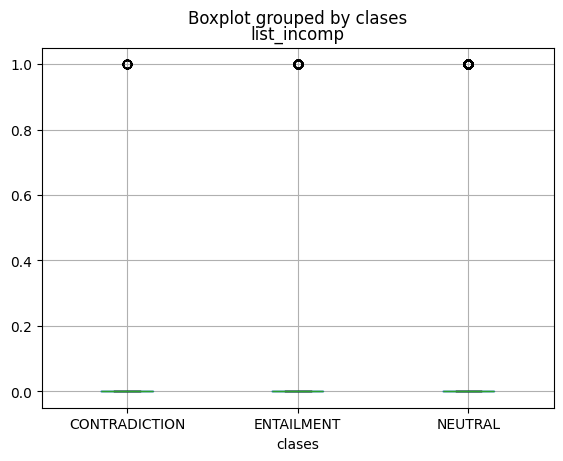

In [6]:
train.boxplot(by="clases",column="list_incomp")

## Eliminar características

In [7]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,8,0.857143,0,0,0.800000,NEUTRAL
1,0.516922,1.424649,1.913,1.379,3.886845,0.005261,0.299131,2,0.142857,0,8,1,7,0.875000,0,0,0.333333,NEUTRAL
2,0.000000,0.000000,2.176,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,7,1.000000,0,0,0.400000,ENTAILMENT
3,0.389672,5.665914,1.909,1.684,3.834346,0.006025,0.180114,1,0.800000,0,8,4,5,0.375000,0,0,0.333333,NEUTRAL
4,0.832495,8.487221,2.183,2.056,3.847619,0.005217,0.287820,2,0.857143,1,8,6,7,0.500000,0,0,0.166667,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.062812,5.751723,1.053,0.811,3.786475,0.006455,0.084316,1,1.333333,0,6,4,3,0.333333,0,0,0.200000,NEUTRAL
4435,0.073710,5.698565,1.384,1.384,3.779084,0.008525,0.056842,0,1.333333,0,4,4,3,0.250000,0,1,0.000000,NEUTRAL
4436,0.298256,8.566221,1.688,1.688,3.742518,0.005599,0.195824,3,1.200000,1,6,6,5,0.000000,0,0,0.000000,NEUTRAL
4437,0.358468,1.437292,1.411,1.459,3.685267,0.004270,0.156616,1,0.166667,0,3,1,6,0.333333,0,0,0.333333,NEUTRAL


In [8]:
#train = train[['list_incomp','Jaro-Winkler_rit','overlap_ent','mutinf','list_m','clases']]

In [9]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [10]:
#train=train[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]

In [11]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [12]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [13]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.363547,0.341465,0.762844,0.648115,0.400556,0.892786,0.005026,0.238546,0.386175,0.216374,0.366102,0.308164,-0.185410,-0.055860,-0.044131,-0.262928
distancias,0.363547,1.000000,-0.012883,0.691539,0.654614,0.566832,0.372621,0.127920,0.884405,0.370696,0.428857,0.999796,0.120993,-0.621364,-0.051368,0.073344,-0.662355
entropia_total,0.341465,-0.012883,1.000000,0.277554,0.072564,-0.006661,0.287666,0.135736,-0.096237,0.088263,0.251743,-0.012878,0.254476,0.130767,-0.024774,-0.043260,0.050032
entropias,0.762844,0.691539,0.277554,1.000000,0.874748,0.681901,0.774868,0.070813,0.613360,0.399911,0.248072,0.691596,0.162282,-0.486982,-0.071500,0.033075,-0.540978
mutinf,0.648115,0.654614,0.072564,0.874748,1.000000,0.822951,0.701428,0.079013,0.630939,0.344516,0.186650,0.655295,0.066845,-0.522950,-0.094795,0.144442,-0.549448
mearts,0.400556,0.566832,-0.006661,0.681901,0.822951,1.000000,0.461606,0.070462,0.598329,0.255767,0.109963,0.570738,-0.035139,-0.489665,-0.087811,0.095024,-0.509680
max_info,0.892786,0.372621,0.287666,0.774868,0.701428,0.461606,1.000000,-0.045217,0.321641,0.522675,0.098723,0.374065,0.125558,-0.225216,-0.055487,-0.034390,-0.295742
list_comp,0.005026,0.127920,0.135736,0.070813,0.079013,0.070462,-0.045217,1.000000,0.063959,-0.200556,0.213119,0.126807,0.100918,-0.179155,-0.052357,-0.043872,-0.398323
diferencias,0.238546,0.884405,-0.096237,0.613360,0.630939,0.598329,0.321641,0.063959,1.000000,0.333982,0.222542,0.887679,-0.196375,-0.662950,-0.066649,0.080445,-0.665597
list_incomp,0.386175,0.370696,0.088263,0.399911,0.344516,0.255767,0.522675,-0.200556,0.333982,1.000000,0.070888,0.370209,0.056491,-0.104629,-0.036201,-0.029641,-0.209268


<Axes: >

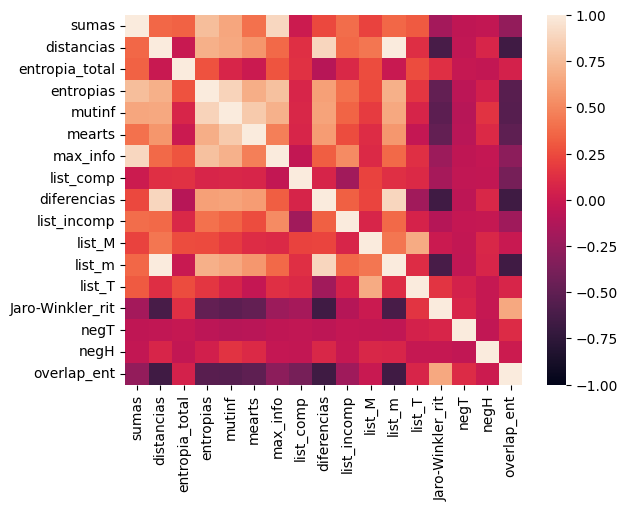

In [14]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [15]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.363547,0.341465,0.762844,0.648115,0.400556,0.892786,0.005026,0.238546,0.386175,0.216374,0.366102,0.308164,-0.185410,-0.055860,-0.044131,-0.262928
distancias,0.363547,1.000000,-0.012883,0.691539,0.654614,0.566832,0.372621,0.127920,0.884405,0.370696,0.428857,0.999796,0.120993,-0.621364,-0.051368,0.073344,-0.662355
entropia_total,0.341465,-0.012883,1.000000,0.277554,0.072564,-0.006661,0.287666,0.135736,-0.096237,0.088263,0.251743,-0.012878,0.254476,0.130767,-0.024774,-0.043260,0.050032
entropias,0.762844,0.691539,0.277554,1.000000,0.874748,0.681901,0.774868,0.070813,0.613360,0.399911,0.248072,0.691596,0.162282,-0.486982,-0.071500,0.033075,-0.540978
mutinf,0.648115,0.654614,0.072564,0.874748,1.000000,0.822951,0.701428,0.079013,0.630939,0.344516,0.186650,0.655295,0.066845,-0.522950,-0.094795,0.144442,-0.549448
mearts,0.400556,0.566832,-0.006661,0.681901,0.822951,1.000000,0.461606,0.070462,0.598329,0.255767,0.109963,0.570738,-0.035139,-0.489665,-0.087811,0.095024,-0.509680
max_info,0.892786,0.372621,0.287666,0.774868,0.701428,0.461606,1.000000,-0.045217,0.321641,0.522675,0.098723,0.374065,0.125558,-0.225216,-0.055487,-0.034390,-0.295742
list_comp,0.005026,0.127920,0.135736,0.070813,0.079013,0.070462,-0.045217,1.000000,0.063959,-0.200556,0.213119,0.126807,0.100918,-0.179155,-0.052357,-0.043872,-0.398323
diferencias,0.238546,0.884405,-0.096237,0.613360,0.630939,0.598329,0.321641,0.063959,1.000000,0.333982,0.222542,0.887679,-0.196375,-0.662950,-0.066649,0.080445,-0.665597
list_incomp,0.386175,0.370696,0.088263,0.399911,0.344516,0.255767,0.522675,-0.200556,0.333982,1.000000,0.070888,0.370209,0.056491,-0.104629,-0.036201,-0.029641,-0.209268


In [16]:
# Checar variables colineales
#sns.relplot(data=train_m, x="list_bigram", y="bi_ent_trip_rel")

In [17]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [18]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    elif i == "NEUTRAL":
        y_train.append(2)
    else:
        y_train.append(0)

In [19]:
y_train.count(2)

2524

In [20]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

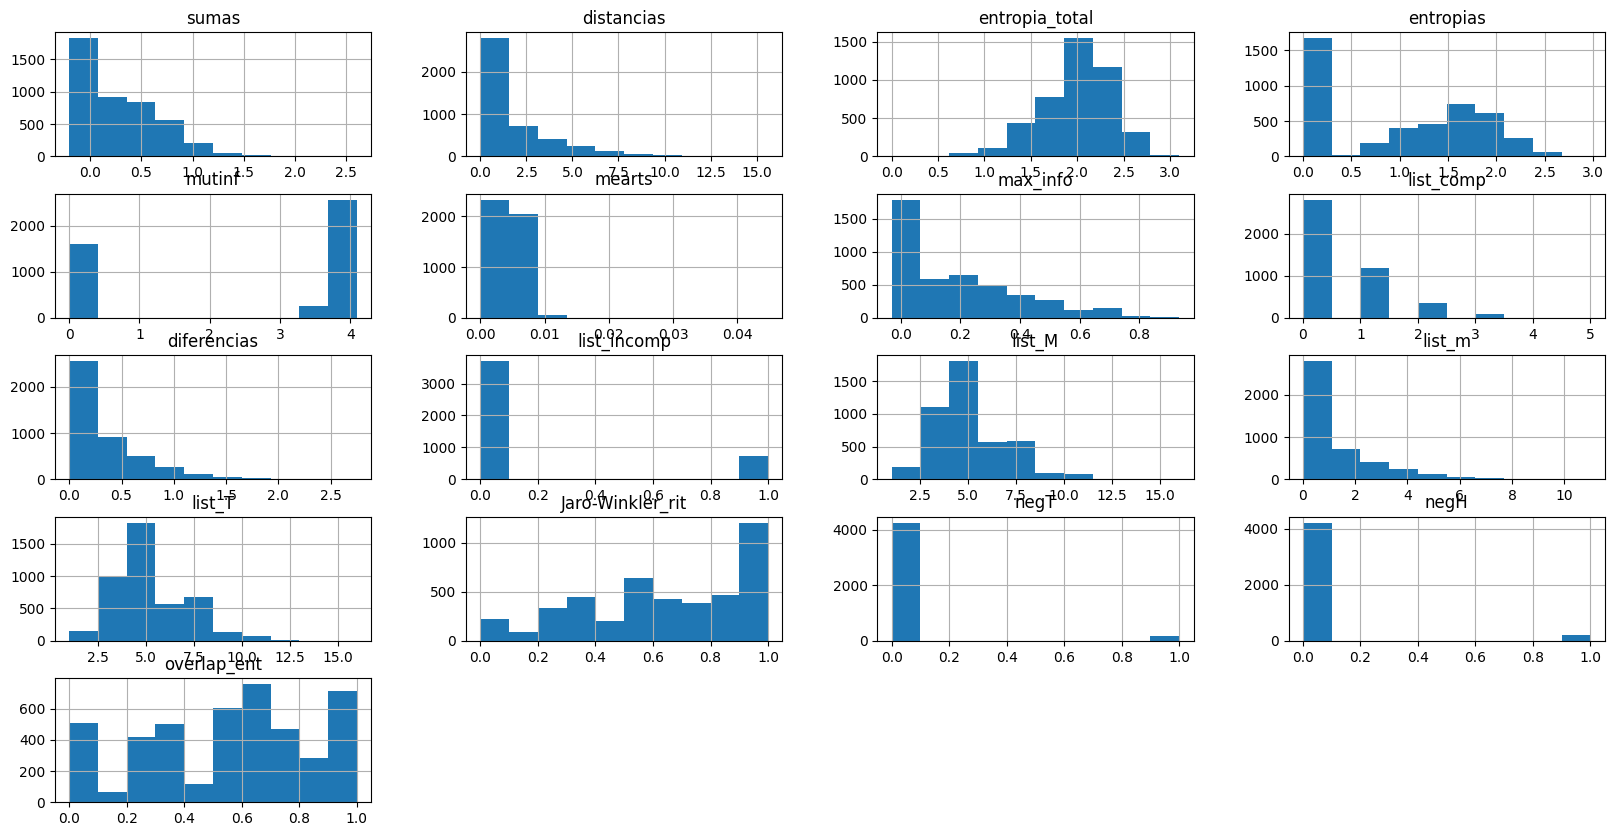

In [21]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [22]:
for i in range(50):
    if i==0:
        test = pd.read_pickle('salida/nuevo4e/SICK/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4e/SICK/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [23]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,,0,,0.000000,CONTRADICTION
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,,0,,0.666667,CONTRADICTION
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,,0,,0.333333,CONTRADICTION
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,,0,,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,,0,,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,,0,,0.250000,CONTRADICTION
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,,0,,0.000000,CONTRADICTION
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,,0,,0.000000,CONTRADICTION
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,,0,,0.000000,CONTRADICTION


In [24]:
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_TEST.csv")
temp1

,sentence_A,sentence_B,entailment_label
0,There is no boy playing outdoors and there is ...,A group of kids is playing in a yard and an ol...,NEUTRAL
1,A group of boys in a yard is playing and a man...,The young boys are playing outdoors and the ma...,NEUTRAL
2,A group of children is playing in the house an...,The young boys are playing outdoors and the ma...,NEUTRAL
3,A brown dog is attacking another animal in fro...,A brown dog is attacking another animal in fro...,ENTAILMENT
4,A brown dog is attacking another animal in fro...,A brown dog is helping another animal in front...,NEUTRAL
...,...,...,...
4901,The young girl is blowing a bubble that is huge,There is no girl in pink twirling a ribbon,NEUTRAL
4902,A dog in a colored coat is running across the ...,The flute is being played by one man,NEUTRAL
4903,A boy is happily playing the piano,A white bird is landing swiftly in the water,NEUTRAL
4904,"The girl, who is little, is combing her hair i...",Two people wearing helmets are driving over th...,NEUTRAL


In [25]:
test["clases"]=temp1["entailment_label"]
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,,0,,0.000000,NEUTRAL
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,,0,,0.666667,NEUTRAL
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,,0,,0.333333,NEUTRAL
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,,0,,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,,0,,0.833333,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,,0,,0.250000,NEUTRAL
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,,0,,0.000000,NEUTRAL
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,,0,,0.000000,NEUTRAL
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,,0,,0.000000,NEUTRAL


In [26]:
test=test.drop(["verbH","verbT"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0.000000,NEUTRAL
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0.666667,NEUTRAL
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0.333333,NEUTRAL
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0.833333,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,NEUTRAL
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0.000000,NEUTRAL
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,0,0.000000,NEUTRAL
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,0,0.000000,NEUTRAL


In [27]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test = test[['list_incomp','Jaro-Winkler_rit','overlap_ent','mutinf','list_m','clases']]
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0.000000,NEUTRAL
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0.666667,NEUTRAL
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0.333333,NEUTRAL
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0.833333,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,NEUTRAL
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0.000000,NEUTRAL
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,0,0.000000,NEUTRAL
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,0,0.000000,NEUTRAL


In [28]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0.000000,NEUTRAL
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0.666667,NEUTRAL
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0.333333,NEUTRAL
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0.833333,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,NEUTRAL
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0.000000,NEUTRAL
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,0,0.000000,NEUTRAL
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,0,0.000000,NEUTRAL


In [29]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [30]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    elif i == "NEUTRAL":
        y_test.append(2)
    else:
        y_test.append(0)

In [31]:
y_test.count(1)

1404

In [32]:
y_test.count(0)

712

In [33]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [34]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [35]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [36]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [37]:
X_train.shape

(4439, 17)

In [38]:
model = LogisticRegression(penalty="l2", C=1,max_iter=500)
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=500)

In [39]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [40]:
model.decision_function(X)

array([[-1.18937364,  1.1075109 ,  0.08186274],
       [-1.53589442, -0.31836621,  1.85426063],
       [-0.31695908,  0.27227859,  0.04468049],
       ...,
       [-5.01321697, -0.07938594,  5.09260291],
       [-2.27764083, -0.02450724,  2.30214806],
       [-1.90544129, -1.39688339,  3.30232468]])

In [41]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [42]:
model.classes_

array([0, 1, 2])

In [43]:
model.coef_[0]

array([-0.47308177, -1.02130701,  0.00688719, -0.79445449,  0.25729505,
       -0.26342081, -1.09464214, -4.53291772, -0.79684953, -0.47568313,
        3.28369514, -1.01846599, -3.6092813 ,  1.85837296,  2.25944861,
        2.1347168 , -1.97909766])

In [44]:
coeficientes=model.coef_[0]

In [45]:
coeficientes

array([-0.47308177, -1.02130701,  0.00688719, -0.79445449,  0.25729505,
       -0.26342081, -1.09464214, -4.53291772, -0.79684953, -0.47568313,
        3.28369514, -1.01846599, -3.6092813 ,  1.85837296,  2.25944861,
        2.1347168 , -1.97909766])

In [46]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  10 list_M 7 list_comp


In [47]:
n_columns=train.shape[1]-1

In [48]:
n_columns

17

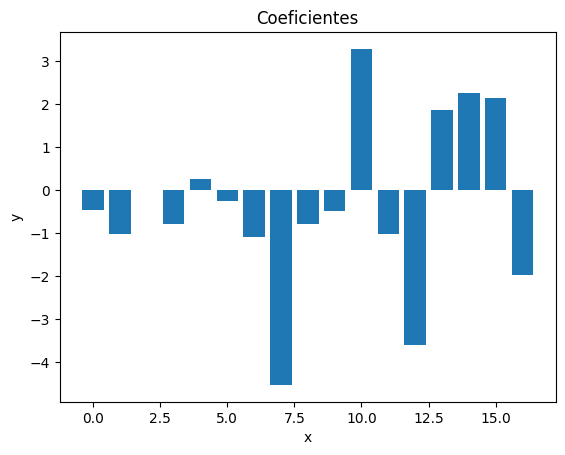

In [49]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [50]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [51]:
X_test.shape

(4906, 17)

In [52]:
predictions = model.predict(X_test)

In [53]:
test["predictions"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0.000000,NEUTRAL,2
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0.666667,NEUTRAL,2
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0.333333,NEUTRAL,2
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,1.000000,ENTAILMENT,1
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0.833333,NEUTRAL,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,NEUTRAL,2
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0.000000,NEUTRAL,2
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,0,0.000000,NEUTRAL,2
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,0,0.000000,NEUTRAL,2


In [54]:
test[(test["clases"]=="ENTAILMENT") & (test["predictions"]==0)]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
74,0.000000,0.000000,2.035,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,7,0.714286,0,0,0.500000,ENTAILMENT,0
509,0.000000,0.000000,1.821,0.000,0.000000,0.000000,0.000000,0,0.000000,0,11,0,11,1.000000,0,0,0.666667,ENTAILMENT,0
653,0.000000,0.000000,1.939,0.000,0.000000,0.000000,0.000000,0,0.000000,0,5,0,5,0.800000,0,0,0.500000,ENTAILMENT,0
815,0.000000,0.000000,1.906,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,4,1.000000,0,0,0.666667,ENTAILMENT,0
1006,0.000000,0.000000,1.555,0.000,0.000000,0.000000,0.000000,0,0.000000,0,3,0,4,1.000000,0,0,0.333333,ENTAILMENT,0
1078,0.000000,0.000000,2.007,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,7,1.000000,0,0,0.666667,ENTAILMENT,0
1079,0.000000,0.000000,2.007,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,7,0.714286,0,0,0.500000,ENTAILMENT,0
1567,0.000000,0.000000,1.502,0.000,0.000000,0.000000,0.000000,1,0.000000,0,4,0,4,1.000000,0,0,0.333333,ENTAILMENT,0
1653,0.000000,0.000000,1.750,0.000,0.000000,0.000000,0.000000,0,0.000000,0,4,0,4,1.000000,0,0,0.600000,ENTAILMENT,0
1678,0.000000,0.000000,1.000,0.000,0.000000,0.000000,0.000000,0,0.000000,0,2,0,2,1.000000,0,0,0.666667,ENTAILMENT,0


In [55]:
#test.to_csv("predictions_SICK_DEV.csv")

In [56]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[1026  360   18]
 [ 310 2441   39]
 [ 172  161  379]]


In [57]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.78
precision:  0.79
recall 0.78
f1_score:  0.78
matthews_score:  0.61


In [59]:
X_train.shape

(4439, 17)

In [60]:
X_test.shape

(4906, 17)

In [61]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [62]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [63]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.770000 (0.031536)
Logistic Regression Precision:: 0.780000 (0.033673)
Logistic Regression Recall:: 0.770000 (0.031536)
Logistic Regression F1-score:: 0.770000 (0.031717)


In [ ]:
# Logistic Regression Acurracy:: 0.770000 (0.032756)
# Logistic Regression Precision:: 0.780000 (0.034664)
# Logistic Regression Recall:: 0.770000 (0.032756)
# Logistic Regression F1-score:: 0.770000 (0.032888)

In [63]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.770000 (0.042249)
Logistic Regression Recall:: 0.700000 (0.051050)
Logistic Regression F1-score:: 0.720000 (0.047160)


In [64]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.770000 (0.032756)
Logistic Regression Recall:: 0.770000 (0.032756)
Logistic Regression F1-score:: 0.770000 (0.032756)


In [65]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.590000 (0.075726)


In [64]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [150]:
#linear_model

In [151]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [66]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66       712
           1       0.68      0.73      0.70      1404
           2       0.82      0.87      0.85      2790

    accuracy                           0.78      4906
   macro avg       0.79      0.71      0.74      4906
weighted avg       0.79      0.78      0.78      4906



In [68]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

In [71]:
test.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases', 'predictions'],
      dtype='object')

In [72]:
test.columns[:-2]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [73]:
explainer.expected_value

array([-1.05296489, -0.01670971,  1.0696746 ])

In [74]:
X_test

array([[0.13135032, 0.24632658, 0.68290291, ..., 0.        , 0.        ,
        0.        ],
       [0.15260756, 0.24806094, 0.65969271, ..., 0.        , 0.        ,
        0.66666667],
       [0.15563953, 0.24685911, 0.63779013, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.04250252, 0.3761828 , 0.24452435, ..., 0.        , 0.        ,
        0.        ],
       [0.20882912, 0.36514151, 0.45537757, ..., 0.        , 0.        ,
        0.        ],
       [0.09468945, 0.50557974, 0.52598889, ..., 0.        , 0.        ,
        0.        ]])

In [75]:
shap.plots.beeswarm(shap_values)

ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

In [76]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.4751967  0.24555819 0.87544949 0.78537126 0.93112685 0.10731264
 0.47481402 0.25       0.0952381  0.         0.375      0.25
 0.4        0.83333333 0.         0.         0.25      ] 2 2


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [122]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

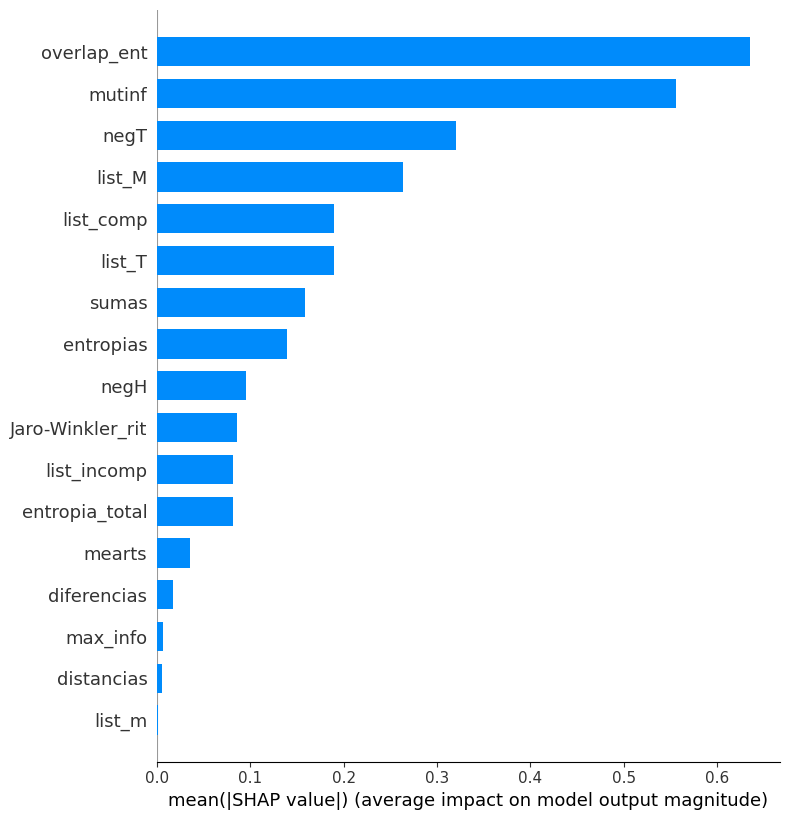

In [77]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

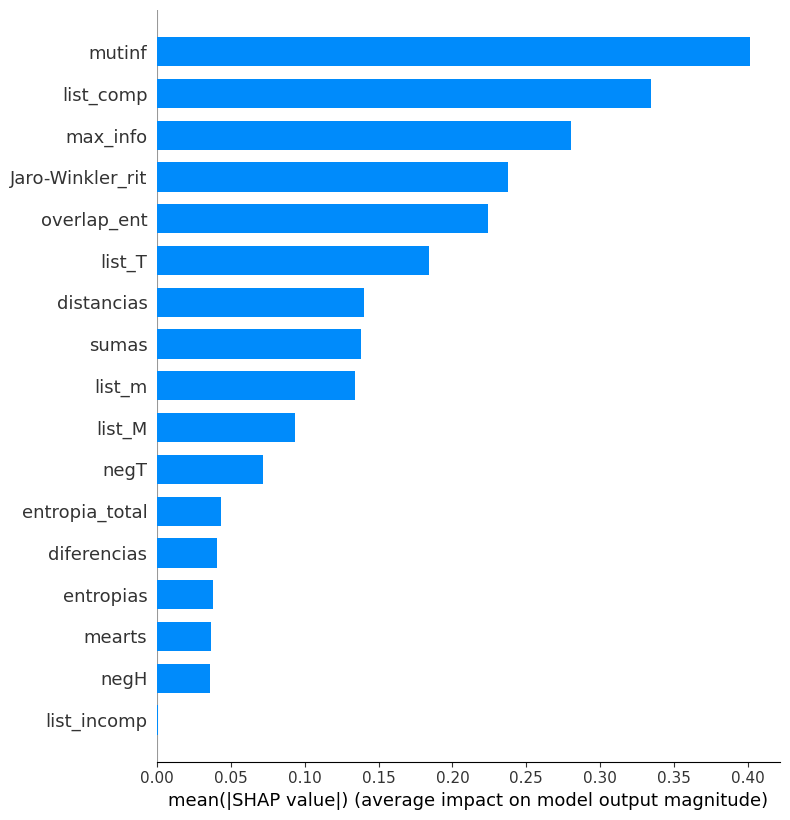

In [78]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

In [83]:
X_test

array([[0.13135032, 0.24632658, 0.68290291, ..., 0.        , 0.        ,
        0.        ],
       [0.15260756, 0.24806094, 0.65969271, ..., 0.        , 0.        ,
        0.66666667],
       [0.15563953, 0.24685911, 0.63779013, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.04250252, 0.3761828 , 0.24452435, ..., 0.        , 0.        ,
        0.        ],
       [0.20882912, 0.36514151, 0.45537757, ..., 0.        , 0.        ,
        0.        ],
       [0.09468945, 0.50557974, 0.52598889, ..., 0.        , 0.        ,
        0.        ]])

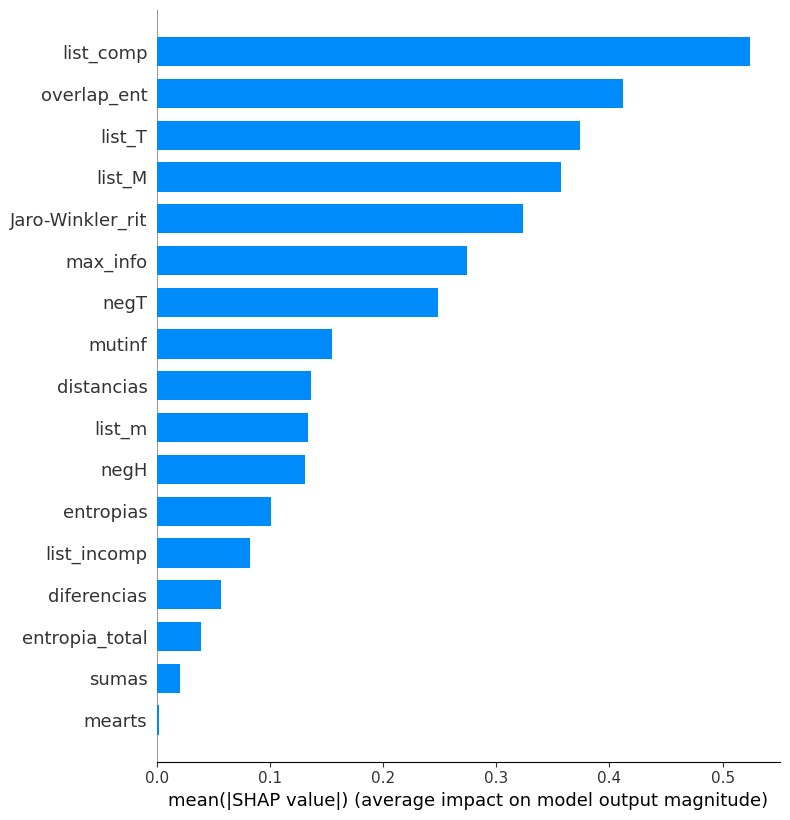

In [79]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

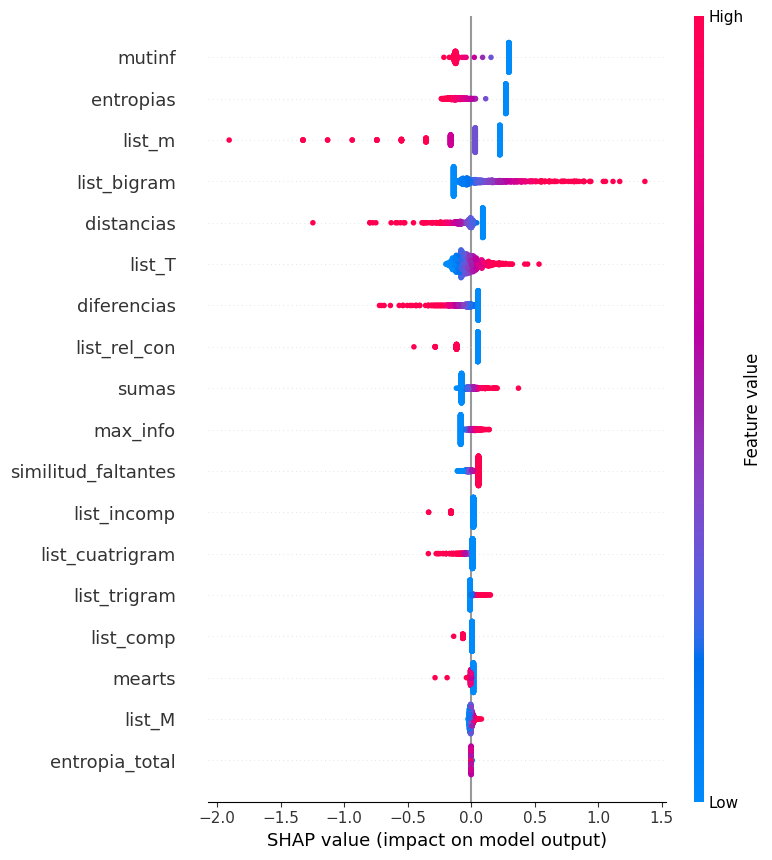

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

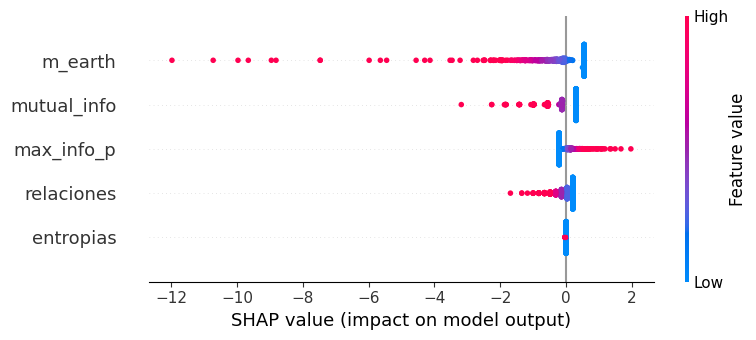

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

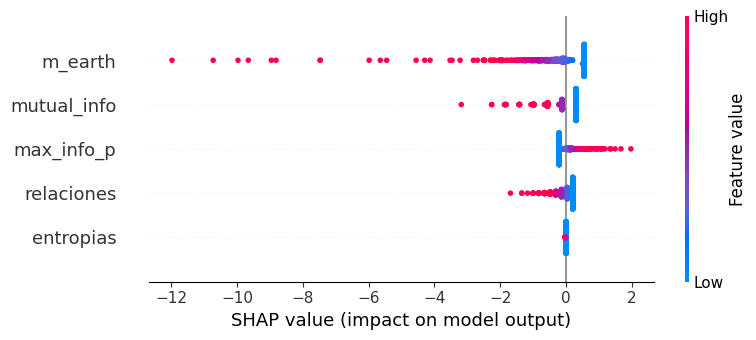

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [65]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [66]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.67


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [67]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [73]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.680000 (0.014004)
DecisionTree: 0.680000 (0.010178)
DecisionTree: 0.680000 (0.013535)
DecisionTree: 0.680000 (0.011671)


In [75]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.680000 (0.015553)
DecisionTree: 0.580000 (0.018540)
DecisionTree: 0.580000 (0.016293)
DecisionTree: 0.580000 (0.019133)


In [70]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred,labels=[1,2,0])

array([[ 860,  303,  241],
       [ 455, 2150,  185],
       [ 288,  158,  266]])

Profundidad del árbol: 23
Número de nodos terminales: 152


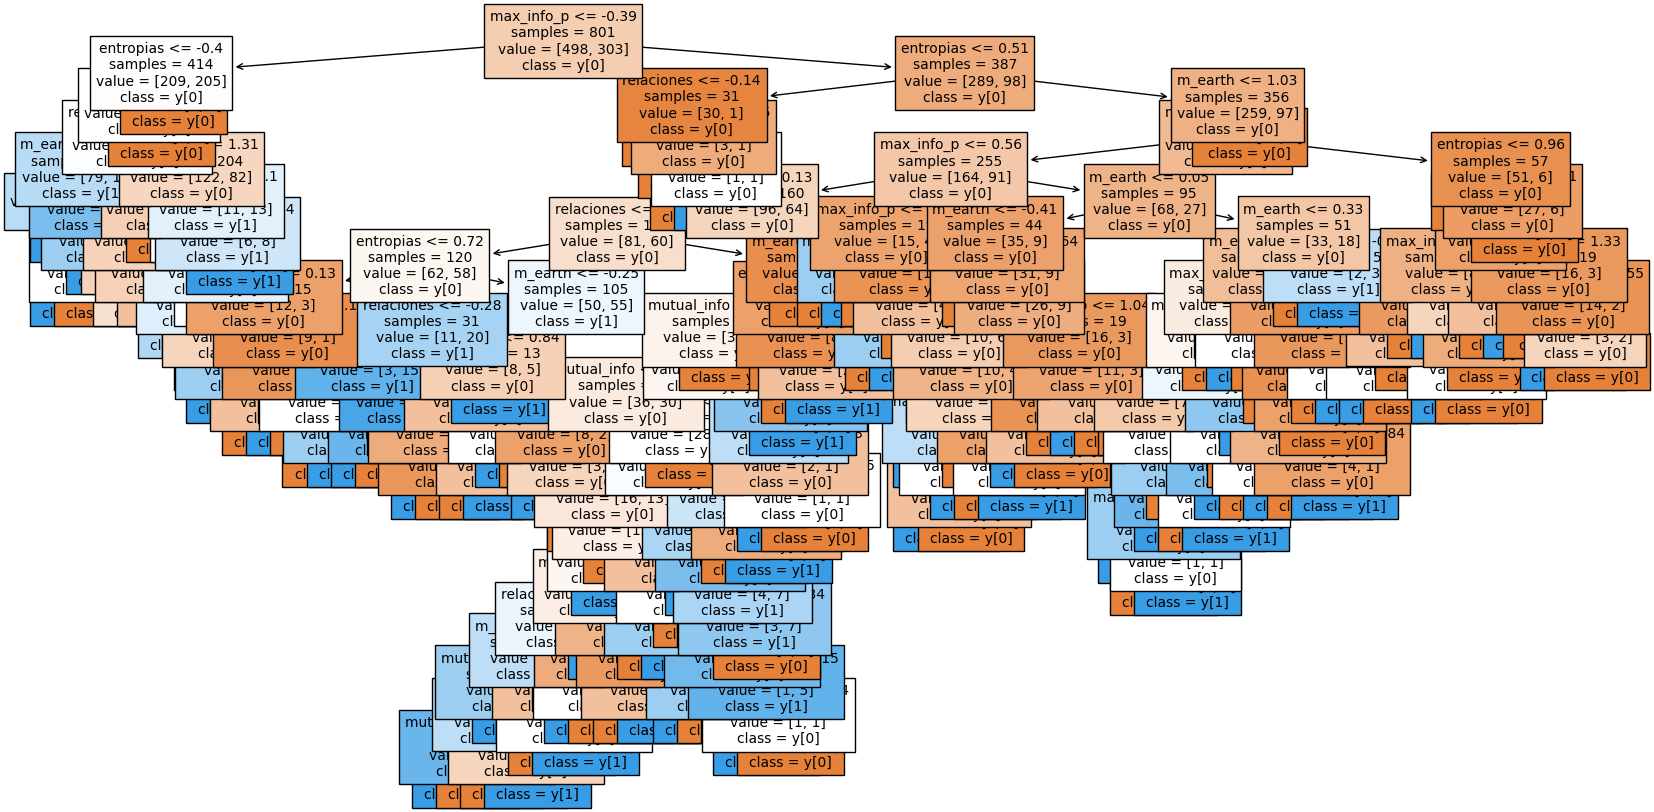

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )